In [11]:
#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

#relevant ML libraries
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
pre = pd.read_csv('./datasets/comparison_feature_data/train_gold_pre.csv')
mid = pd.read_csv('./datasets/comparison_feature_data/train_gold_mid.csv')
late = pd.read_csv('./datasets/comparison_feature_data/train_gold_late.csv')

pre_val = pd.read_csv('./datasets/comparison_feature_data/test_pre.csv')
mid_val = pd.read_csv('./datasets/comparison_feature_data/test_pre.csv')
late_val = pd.read_csv('./datasets/comparison_feature_data/test_pre.csv')



pre_all = pd.read_csv('./datasets/all_feature_data/train_pre.csv')
mid_all = pd.read_csv('./datasets/all_feature_data/train_mid.csv')
late_all = pd.read_csv('./datasets/all_feature_data/train_late.csv')

pre_all_val = pd.read_csv('./datasets/all_feature_data/test_pre.csv')
mid_all_val = pd.read_csv('./datasets/all_feature_data/test_mid.csv')
late_all_val = pd.read_csv('./datasets/all_feature_data/test_late.csv')

raw = pd.read_csv('./datasets/tmp_data_for_exploration/exploredata1.csv')

pre_all_gold = pd.read_csv('./datasets/all_feature_data/train_gold_pre.csv')
mid_all_gold = pd.read_csv('./datasets/all_feature_data/train_gold_mid.csv')
late_all_gold = pd.read_csv('./datasets/all_feature_data/train_gold_late.csv')

In [13]:
def runModel(data_train,data_val,max_depth):
    X_train, Y_train = data_train.drop(['TeamVictory'],axis=1),data_train[['TeamVictory']]
    X_val,Y_val = data_val.drop(['TeamVictory'],axis=1),data_val[['TeamVictory']]
    #Creating a copy of data
    X_scale_train = X_train.copy()
    X_scale_val = X_val.copy()
    #Scaling
    scaler = StandardScaler()
    scaler.fit(X_scale_train)
    scaler.fit(X_scale_val)
    X_scale_train = pd.DataFrame(scaler.transform(X_scale_train),columns= X_scale_train.columns )
    X_scale_val = pd.DataFrame(scaler.transform(X_scale_val),columns= X_scale_val.columns )


    #fit model
    DCT = DecisionTreeClassifier(max_depth=max_depth)
    DCT.fit(X_scale_train,Y_train)
    y_predict = DCT.predict(X_scale_val)
    #print accuracy
    print(classification_report(y_true=Y_val,y_pred=y_predict))
    #plot tree
    plt.figure()
    plt.figure(dpi=200,figsize=(16,10))
    plot_tree(DCT, filled=True,feature_names=list(X_scale_train.columns))
    plt.title("Decision tree trained after pruning")
    plt.show()
    return DCT

In [6]:
def runModel_Umap(data_train,max_depth):
    X_train, Y_train = data_train.drop(['TeamVictory'],axis=1),data_train[['TeamVictory']]
    #Creating a copy of data
    X_scale = X_train.copy()
    #Scaling
    scaler = StandardScaler()
    scaler.fit(X_scale)
    X_scale = pd.DataFrame(scaler.transform(X_scale),columns= X_scale.columns )
    train_X, test_X, train_Y, test_Y = train_test_split(X_scale, Y_train, test_size = 0.2, random_state = 0)

    DCT = DecisionTreeClassifier(max_depth=1)
    DCT.fit(train_X,train_Y)
    y_predict = DCT.predict(test_X)

    print(classification_report(y_true=test_Y,y_pred=y_predict))

    #plot the decision tree with unlimited max depth
    plt.figure()
    plt.figure(dpi=400,figsize=(8,5))
    plot_tree(DCT, filled=True,feature_names=list(train_X.columns))
    plt.title("Decision tree trained after pruning")
    plt.show()
    return DCT

In [ ]:
# runModel_Umap(pre_all_gold, 3)
# runModel_Umap(mid_all_gold, 3)
# runModel_Umap(late_all_gold, 3)

In [ ]:
# #Grid Search
# X_train, Y_train = mid.drop(['TeamVictory'],axis=1),mid[['TeamVictory']]
# #Creating a copy of data
# X_scale = X_train.copy()
# #Scaling
# scaler = StandardScaler()
# scaler.fit(X_scale)
# X_scale = pd.DataFrame(scaler.transform(X_scale),columns= X_scale.columns )
# train_X, test_X, train_Y, test_Y = train_test_split(X_scale, Y_train, test_size = 0.2, random_state = 0)

# param_grid = [
#         {
#             'max_depth' : range(1,20),
            
#         }
#        ]

# clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3,
#                            scoring='accuracy')
# clf.fit(train_X,train_Y)


# print("Best parameters set found on development set:")
# print(clf.best_params_)

In [15]:
runModel(pre_all,pre_all_val,3)
runModel(mid_all,mid_all_val,3)
runModel(late_all,late_all_val,3)

c:\Users\oukai\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- Team1_Bot_goldAbility
- Team1_Jug_goldAbility
- Team1_Mid_goldAbility
- Team1_Top_goldAbility
- Team1_Uti_goldAbility
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 47 features, but StandardScaler is expecting 57 features as input.

In [ ]:
# runModel(pre_all,3)

In [ ]:
# #Grid Search
# X_train, Y_train = pre.drop(['TeamVictory'],axis=1),pre[['TeamVictory']]
# #Creating a copy of data
# X_scale = X_train.copy()
# #Scaling
# scaler = StandardScaler()
# scaler.fit(X_scale)
# X_scale = pd.DataFrame(scaler.transform(X_scale),columns= X_scale.columns )
# train_X, test_X, train_Y, test_Y = train_test_split(X_scale, Y_train, test_size = 0.2, random_state = 0)


# param_grid = [
#         {
#             'n_estimators' : range(10,101,10),
#             'max_depth' : range(5,15),
#             'min_samples_leaf' : range(5,15),
            
#         }
#        ]

# clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=3,
#                            scoring='accuracy')
# clf.fit(train_X,train_Y.values.ravel())


# print("Best parameters set found on development set:")
# print(clf.best_params_)

In [15]:
X_train, Y_train = pre.drop(['TeamVictory'],axis=1),pre[['TeamVictory']]
X_val,Y_val = pre_val.drop(['TeamVictory'],axis=1),pre_val[['TeamVictory']]
#Creating a copy of data
X_scale_train = X_train.copy()
X_scale_val = X_val.copy()
#Scaling
scaler = StandardScaler()
scaler.fit(X_scale_train)
scaler.fit(X_scale_val)
X_scale_train = pd.DataFrame(scaler.transform(X_scale_train),columns= X_scale_train.columns )
X_scale_val = pd.DataFrame(scaler.transform(X_scale_val),columns= X_scale_val.columns )

In [16]:
RDF = RandomForestClassifier(max_depth=5, n_estimators=60)
RDF.fit(X_scale_train,Y_train.values.ravel())

RandomForestClassifier(max_depth=5, n_estimators=60)

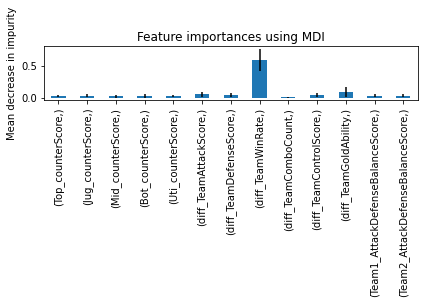

In [17]:
import time

feature_names = [X_scale_train.columns[range(0,13)]]
start_time = time.time()
importances = RDF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RDF.estimators_], axis=0)
elapsed_time = time.time() - start_time
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()